Aleksander Kwaśnioch 151887 grupa lab 8
https://www.kaggle.com/datasets/oles04/top-leagues-player?fileType=csv&page=3
Zbiór danych reprezentuje statystyki piłkarskie z sezonu 2022/2023 w pięciu największych ligach na świecie - angielska Premier League, hiszpańska La Liga, francuska Ligue 1, niemiecka Bundesliga oraz włoska Serie A. W zbiorze figurują dane takie jak:
- Nazwiska zawodników,
- kluby w których grają,
- cena transferu,
- wartość rynkowa,
- pozycje,
- wzrost,
- lepsza noga,
- agent piłkarza,
- numer na koszulce,
I wiele więcej.
Zdecydowałem się na taką tematykę, ze względu na moje wysokie zainteresowanie piłką nożną, ale również zjawiskiem zachodzącym między wiekiem, ceną transferów i wartością rynkową poszczególnych zawodników. 

In [107]:
dane <- read.csv("/Users/mac2019/Desktop/top5_leagues_player.csv")

In [97]:
library(ggplot2)

In [108]:
str(dane)

'data.frame':	2612 obs. of  18 variables:
 $ X               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ name            : chr  "Ederson" "Stefan Ortega" "Scott Carson" "Rúben Dias" ...
 $ full_name       : chr  "" "Stefan Ortega Moreno" "Scott Paul Carson" "Rúben Santos Gato Alves Dias" ...
 $ age             : int  29 30 37 26 28 28 28 27 22 28 ...
 $ height          : num  1.88 1.85 1.88 1.87 1.8 1.88 1.89 1.88 1.71 1.85 ...
 $ nationality     : chr  "Brazil  Portugal" "Germany  Spain" "England" "Portugal" ...
 $ place_of_birth  : chr  "Osasco (SP)" "Hofgeismar" "Whitehaven" "Amadora" ...
 $ price           : num  45 6 0.25 75 35 30 30 30 15 NA ...
 $ max_price       : num  70 6 6 75 40 60 75 40 15 45 ...
 $ position        : chr  "Goalkeeper" "Goalkeeper" "Goalkeeper" "Defender - Centre-Back" ...
 $ shirt_nr        : int  31 18 33 3 6 5 14 25 21 22 ...
 $ foot            : chr  "left" "right" "right" "right" ...
 $ club            : chr  "Man City" "Man City" "Man City" "Man City" ...
 $ con


[17,22] (22,27] (27,32] (32,37] (37,42] 
    601    1007     740     239      25 


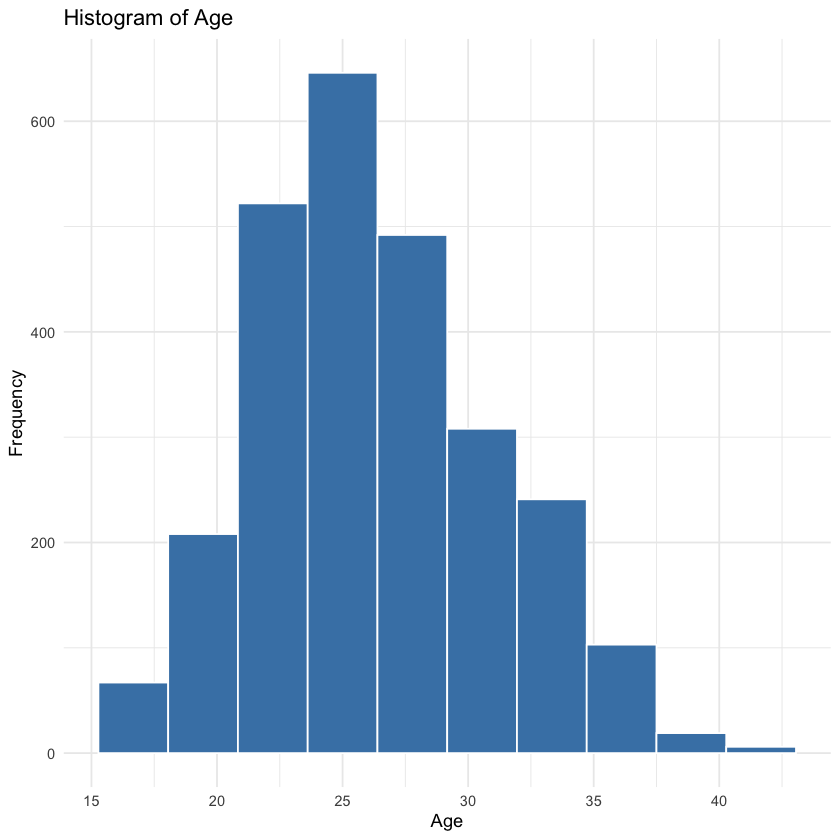

In [109]:
age_breaks <- seq(17, 42, by = 5)  # Zakres wieku od 20 do 40 z krokiem 5
age_freq <- table(cut(dane$age, breaks = age_breaks, include.lowest = TRUE))  # Tworzenie tabeli częstości

# Wyświetlanie szeregu rozdzielczego
print(age_freq)

# Tworzenie histogramu
ggplot(dane, aes(x = age)) +
  geom_histogram(bins = 10, fill = "steelblue", color = "white") +
  labs(x = "Age", y = "Frequency", title = "Histogram of Age") +
  theme_minimal()

Histogram przedstawia wiek piłkarzy w pięciu największych ligach świata - nie ma tutaj zaskoczenia, możemy wyciągnąć bardzo podstawowe wnioski:

Zawodnicy w przedziale wiekowym 22-27 lat są prawdopodobnie najbardziej potrzebnymi zawodnikami, oprócz tego że są w piłkarskim kwiecie wieku, to mają jeszcze wiele czasu na zdobywanie niezbędnego doświadczenia.
Z drugiej strony można zauważyć, że przedział wiekowy 37-42 lat jest już zbyt zaawansowany dla tak szybkich oraz technicznych lig.

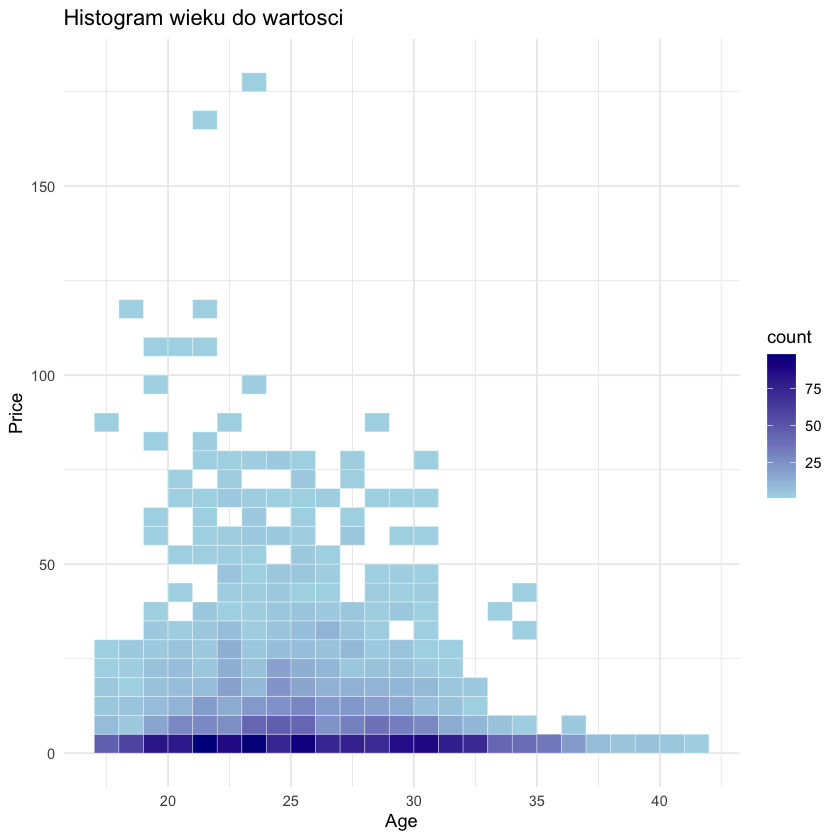

In [123]:
# Usunięcie wierszy zawierających brakujące wartości dla price i age
dane_filtered <- na.omit(dane[c("price", "age")])

# Tworzenie histogramu
ggplot(data = dane_filtered, aes(x = age, y = price)) +
  geom_bin2d(binwidth = c(1, 5), bins = c(20, 20), aes(fill = after_stat(count)), color = "white") +
  scale_fill_gradient(low = "lightblue", high = "darkblue") +
  labs(x = "Age", y = "Price", title = "Histogram wieku do wartosci") +
  theme_minimal()


Powyższy histogram przedstawia zależność wieku do ceny wszystkich zawodników w lidze. Dla osób, które nie interesują się piłką nożną (oraz ogółem sportów zespołowych) rzuci się w oczy, iż najwyższa wartość rynkowa dotyczy głównie zawodników w przedziale 20-25 lat, ale zaraz po nich góruje przedział 25-30. Jest to zależne od tego, że zawodnicy 20-25 są mają największy "potencjał", który jest czynnikiem składającym się z dotychczasowych możliwości zaprezentowanych na boisku + mają przed sobą jeszcze wiele lat prawdopodobnego rozwoju. Za to wysoka wartość graczy 25-30, mówi bardzo wiele o umiejętnościach indywidualnych oraz nie jest już aż tak przeszacowywana - dużo bardziej wiadomo czego się po nich spodziewać przy potencjalnym transferze.

Warning message:
“Removed 8 rows containing non-finite values (`stat_bin2d()`).”


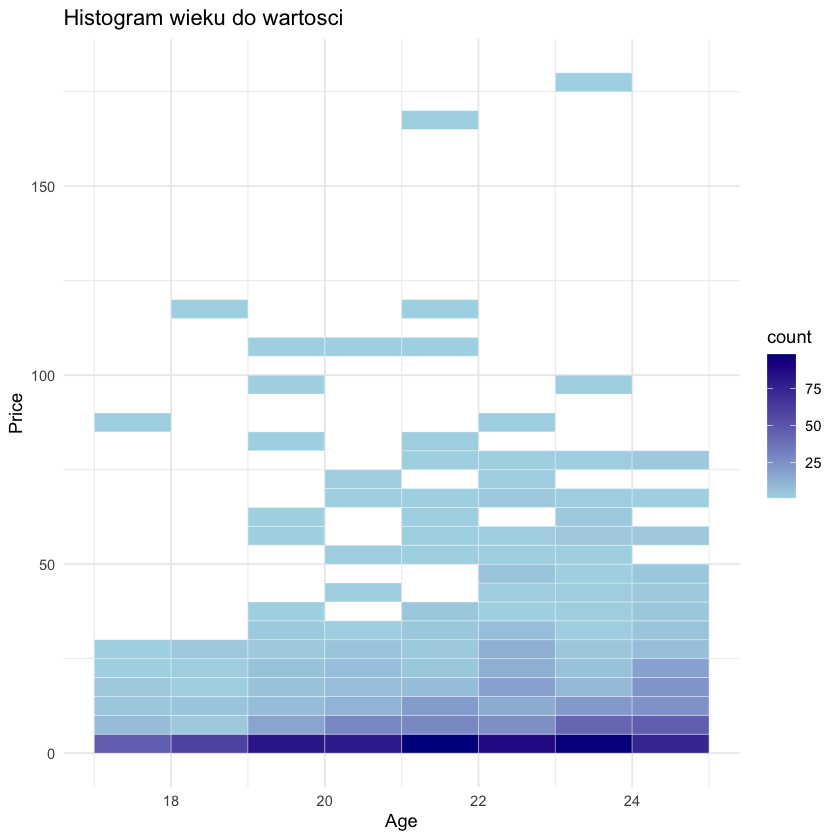

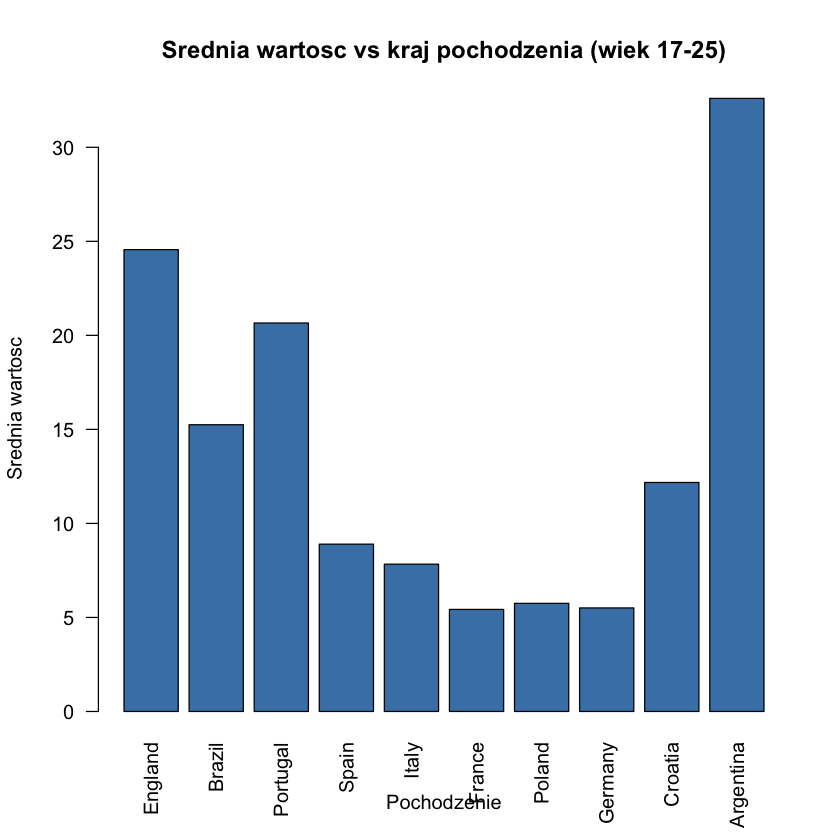

In [158]:
# Filtrowanie danych dla wieku 17-25
dane_filtered2 <- dane[dane$age >= 17 & dane$age <= 25, ]

ggplot(data = dane_filtered2, aes(x = age, y = price)) +
  geom_bin2d(binwidth = c(1, 5), bins = c(20, 20), aes(fill = after_stat(count)), color = "white") +
  scale_fill_gradient(low = "lightblue", high = "darkblue") +
  labs(x = "Age", y = "Price", title = "Histogram wieku do wartosci") +
  theme_minimal()

# Obliczanie średnich zarobków ze względu na pochodzenie
nationalities <- c("England", "Brazil", "Portugal", "Spain", "Italy", "France", "Poland", "Germany", "Croatia", "Argentina")
dane_filtered3 <- dane[dane$age >= 17 & dane$age <= 25 & dane$nationality %in% nationalities, ]
avg_prices <- numeric(length(nationalities))

for (i in 1:length(nationalities)) {
  nationality <- nationalities[i]
  prices <- dane_filtered3[dane_filtered3$nationality == nationality, "price"]
  avg_prices[i] <- mean(prices, na.rm = TRUE)
}

# Tworzenie wykresu słupkowego
barplot(avg_prices, names.arg = nationalities, xlab = "Pochodzenie", ylab = "Srednia wartosc",
        main = "Srednia wartosc vs kraj pochodzenia (wiek 17-25)", col = "steelblue", las = 2)

Powyższy histogram to przybliżenie poprzedniego w przedziale 17-25. Konfrontuje go z wykresem pokazującym średnią wartość dla danych narodowości, by pokazać która narodowość jest być może najbardziej ceniona wśród reszty. Warto zwrócić uwagę, iż statystyka ta może być lekko zakłamana bez kontekstu ilu zawodników danej narodowości jest w każdej z tych lig, ale uwydatnia trafność hipotezy wytworzonej w świecie kibicowskim o tym, że Anglicy są jednym z najbardziej cenionych narodowości. 

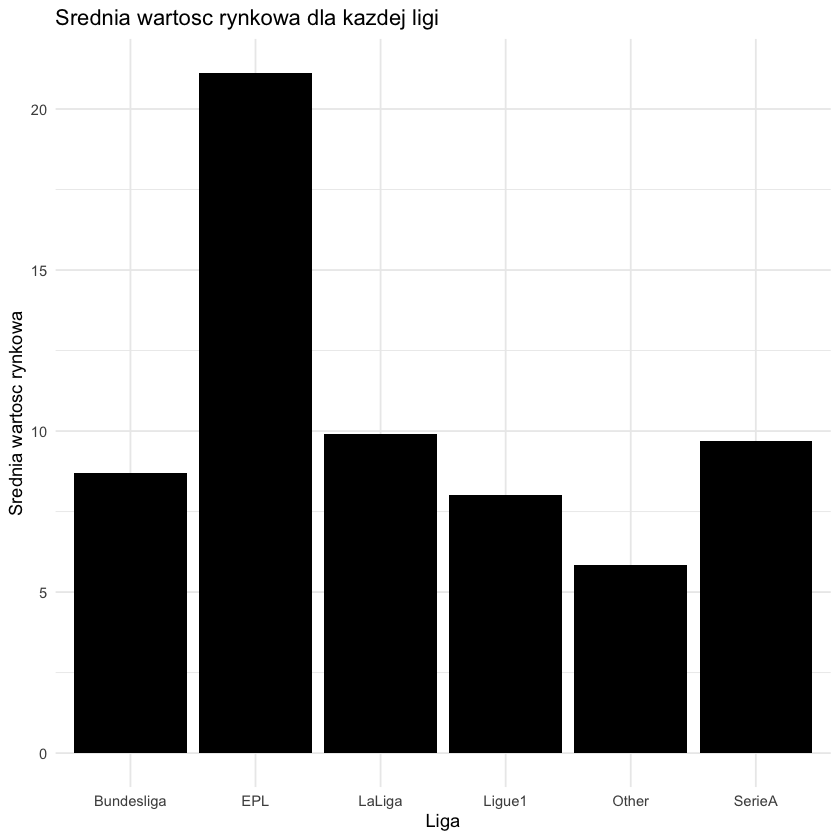

In [156]:
avg_price_by_league <- aggregate(price ~ league, data = dane, FUN = mean)

ggplot(avg_price_by_league, aes(x = league, y = price)) +
  geom_bar(stat = "identity", fill = "black") +
  labs(x = "Liga", y = "Srednia wartosc rynkowa") +
  ggtitle("Srednia wartosc rynkowa dla kazdej ligi") +
  theme_minimal()


Powyższy histogram pokazuje ciekawą zależność między średnimi wartościami piłkarzy w danych ligach. EPL - English Premier League jest uznawana za ligę,w której jest najwyższy poziom rywalizacji między zespołami, co dzięki nie aż tak daleko idącym wnioskom - wyższa wartość = lepsi zawodnicy w obrębie całej ligi - ta statystyka może potwierdzać. Co ciekawe, reszta lig nie różni się od siebie w większym stopniu, widać minimalną różnicę między ligą francuzką oraz resztą, ale poza tym rywalizacja pod względem wartości rynkowej zdaje się być wyrównana. 

In [134]:
price_17_22 <- dane[dane$age >= 17 & dane$age <= 22, "price"]
price_22_27 <- dane[dane$age > 22 & dane$age <= 27, "price"]
price_27_32 <- dane[dane$age > 27 & dane$age <= 32, "price"]
price_32_37 <- dane[dane$age > 32 & dane$age <= 37, "price"]
price_37_42 <- dane[dane$age > 37 & dane$age <= 42, "price"]

price_17_22 <- price_17_22[!is.na(price_17_22)]
mean(price_17_22)
price_22_27 <- price_22_27[!is.na(price_22_27)]
mean(price_22_27)
price_27_32 <- price_27_32[!is.na(price_27_32)]
mean(price_27_32)
price_32_37 <- price_32_37[!is.na(price_32_37)]
mean(price_32_37)
price_37_42 <- price_37_42[!is.na(price_37_42)]
mean(price_37_42)


[1] 9.637563

[1] 14.02972

[1] 9.720528

[1] 2.841213

[1] 0.694

Obliczamy średnią wartość rynkową dla poszczególnych grup wiekowych, by przeprowadzić test Z z hipotezą H0:

Średnia wartość piłkarzy nie różni się w zależności od przedziału wiekowego.

Hipoteza alternatywna (H1): Średnia wartość piłkarzy różni się w zależności od przedziału wiekowego.

In [147]:
# Dane
price_17_22 <- price_17_22[!is.na(price_17_22)]
price_22_27 <- price_22_27[!is.na(price_22_27)]
price_27_32 <- price_27_32[!is.na(price_27_32)]
price_32_37 <- price_32_37[!is.na(price_32_37)]
price_37_42 <- price_37_42[!is.na(price_37_42)]

# Test Z dla przedziału wiekowego 17-22
mu <- mean(price_22_27)  # Średnia wartość rynkowa dla drugiego przedziału wiekowego
sigma <- sd(price_22_27)  # Odchylenie standardowe dla drugiego przedziału wiekowego
n <- 601  # Liczba obserwacji w pierwszym przedziale wiekowym

# Obliczenie statystyki testowej
z <- (mean(price_17_22) - mu) / (sigma / sqrt(n))
alpha <- 0.05

# Obliczenie p-wartości dwustronnej
p_value <- 2 * (1 - pnorm(abs(z)))

# Wypisanie wyników
cat("Statystyka testowa Z:", z, "\n")
cat("P-wartość:", p_value, "\n")
if (p_value < alpha) {
  cat("Odrzucamy hipotezę zerową H0 - średnia wartość rynkowa różni się w zależności od przedziału wiekowego (hipoteza alternatywna H1 przyjęta).\n")
} else {
  cat("Nie ma wystarczających dowodów na odrzucenie hipotezy zerowej H0 - średnia wartość rynkowa nie różni się istotnie w zależności od przedziału wiekowego.\n")
}


Statystyka testowa Z: -6.241597 
P-wartość: 4.33126e-10 
Odrzucamy hipotezę zerową H0 - średnia wartość rynkowa różni się w zależności od przedziału wiekowego (hipoteza alternatywna H1 przyjęta).


In [161]:
mu <- mean(price_27_32)  # Średnia wartość rynkowa dla trzeciego przedziału wiekowego
sigma <- sd(price_27_32)  # Odchylenie standardowe dla trzeciego przedziału wiekowego
n <- 1007 # Liczba obserwacji w drugim przedziale wiekowym

# Obliczenie statystyki testowej
z <- (mean(price_22_27) - mu) / (sigma / sqrt(n))
alpha <- 0.05

# Obliczenie p-wartości dwustronnej
p_value <- 2 * (1 - pnorm(abs(z)))

# Wypisanie wyników
cat("Statystyka testowa Z:", z, "\n")
cat("P-wartość:", p_value, "\n")
if (p_value < alpha) {
  cat("Odrzucamy hipotezę zerową H0 - średnia wartość rynkowa różni się w zależności od przedziału wiekowego (hipoteza alternatywna H1 przyjęta).\n")
} else {
  cat("Nie ma wystarczających dowodów na odrzucenie hipotezy zerowej H0 - średnia wartość rynkowa nie różni się istotnie w zależności od przedziału wiekowego.\n")
}

Statystyka testowa Z: 10.72406 
P-wartość: 0 
Odrzucamy hipotezę zerową H0 - średnia wartość rynkowa różni się w zależności od przedziału wiekowego (hipoteza alternatywna H1 przyjęta).


Dwukrotnie przeprowadzilismy test Z, by upewnić się, że nasza hipoteza alternatywna H1 jest poprawna. Tym sposobem udowodniłem moje dotychczasowe komentarze, które miały miejsce przy histogramach o wieku oraz cenach piłkarzy. Dotatkowo warto zaznaczyć, że nie pojawił się błąd pierwszego ani drugiego stopnia.

Zbiór danych, który poruszyłem w tej pracy jest bardzo rozległy. Skupiłem się głównie na wartościach rynkowych oraz wieku zawodników, ponieważ jako fan piłki nożnej, myślę że to może być najbardziej interesujące dla osoby, która nie jest mocno zaangażowana w ten temat (i prawdopodobnie nie zamierza). W komentarzach pod histogramami wypunktowałem bardziej lub mniej oczywiste wnioski nasuwające się po przeanalizowaniu statystyk. Starałem się również rozjaśnić niektóre pojęcia oraz ogół tematu, by praca mogła być bardziej uniwersalna. 